In [2]:
import numpy as np

from prysm import Pupil

they take several arguments:
* epd, entrance pupil diameter, is a misgnomer for the diameter of the pupil
* samples is the number of linear samples across the pupil diameter; a square array of shape (samples, samples) will be created for both the phase screen and wavefront representations
* wavelength
* opd_unit, unit used when representing the phase error in the pupil.  One of waves, um, or nm.  can also use long-form of these, e.g. um == microns == micrometers.  or latex strings, um == \$\mu m\$.

Units are:
* epd - mm
* wavelength - $\mu m$

In [12]:
# create a pupil object
p = Pupil(epd=5, wavelength=1, samples=512)  # 5mm pupil with light of wavelength 1 micron and 512x512 samples

# this pupil has no phase errors, we need to introduce some for plotting
# but first, the methods available on a pupil:
help(p)

Help on Pupil in module prysm.pupil object:

class Pupil(builtins.object)
 |  Pupil of an optical system.
 |  
 |  Properties:
 |      slice_x: slice through the x axis of the pupil.  Returns (x,y)
 |               data where x is the sample coordinate and y is the phase.
 |  
 |      slice_y: slice through the y axis of the pupil.  Returns (x,y)
 |               data where x is the sample coordinate and y is the phase.
 |  
 |      pv: Peak-To-Valley wavefront error.
 |  
 |      rms: Root Mean Square wavefront error.
 |  
 |  Instance Methods:
 |      plot2d: Makes a 2D plot of the phase of the pupil.  Returns (fig, ax).
 |  
 |      plot_slice_xy: Makes a 1D plot of slices through X and Y of the phase
 |                     of the pupil.  Returns (fig, ax).
 |  
 |      interferogram: Makes an interferogram of the pupil.  Returns (fig, ax)
 |  
 |      build: Computes the phase and wavefunction of the pupil.
 |  
 |      clip: Clips the pupil to a circular boundary.
 |  
 |      mer

In [24]:
# add a decaying sine wave in x and sine wave in y of phase error.
x, y = np.linspace(-1,1, p.samples), np.linspace(-1,1,p.samples)
xx, yy = np.meshgrid(x,y)
p.phase = np.cos(xx*1.5) * np.sin(yy*1.5)
p.clip();  # if you modify the phase, you should call .clip to re-enforce the mask

# should also call ._phase_to_wavefunction() to update the wavefront if you plan to use the pupil for PSF or MTF models

(<matplotlib.figure.Figure at 0x1dd4b86f160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dd4b83eb00>)

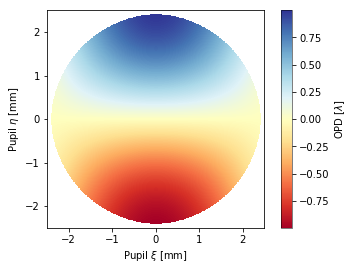

In [25]:
# pupils can be plotted in 2D
p.plot2d()

(<matplotlib.figure.Figure at 0x1dd4b797a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dd4b797438>)

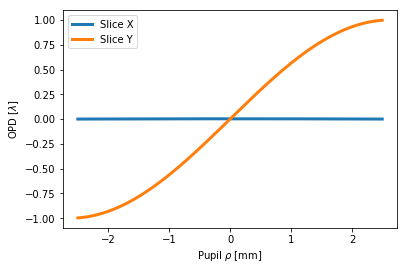

In [21]:
# or x, y slices
p.plot_slice_xy()

(<matplotlib.figure.Figure at 0x1dd4b90b588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dd4c801198>)

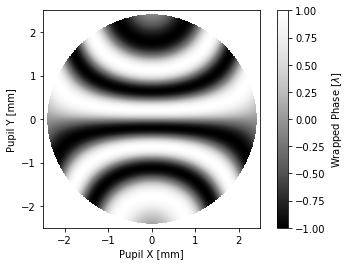

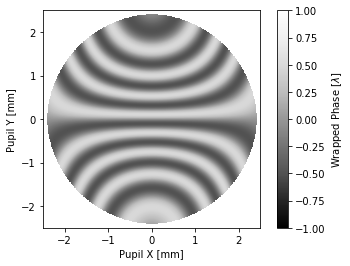

In [27]:
# simulated interferograms
p.interferogram()

# can specify number of passes and visibility
p.interferogram(passes=4, visibility=0.5)